# Statistical analysis of hr characteristics of a company. Using A/B testing and LDA (Linear discriminant analysis) model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#this setting make figures lager
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

## 1. Loading the source file

In [7]:
hr = pd.read_csv('hr_source_file.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2.1. Calculate main statistical characteristics for applicable variables (mean, median, min/max, STD).

In [8]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## 2.2. Calculate main statistical characteristics for applicable variables (mode).

In [5]:
hr.mode(dropna=True).drop(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


## 3.1. Calculate and visualize correlation matrix for quantitative variables.

In [9]:
hr_quantitative_corr = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']].corr()
hr_quantitative_corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


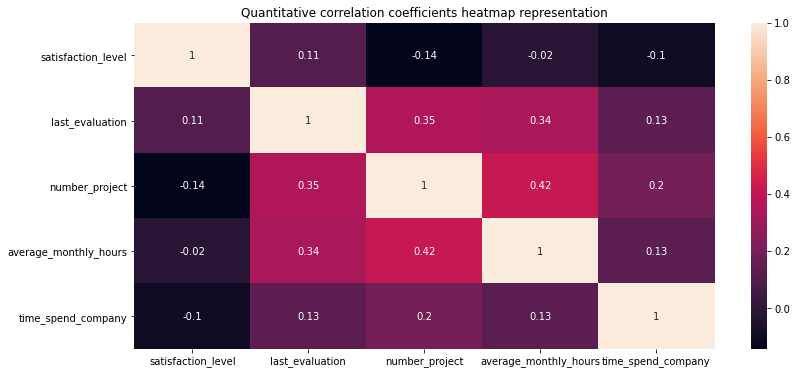

In [17]:
sns.heatmap(hr_quantitative_corr, annot=True).set(title='Quantitative correlation coefficients heatmap representation');

## 3.2. Determine two most and least correlated variables:

- Two most correlated variables - average_monthly_hours, number_project (0.42)
- Two least correlated variables - average_monthly_hours, satisfaction_level (-0.02)

## 4. Calculate the number of employees in every department.

In [11]:
hr_by_department = hr.groupby('department').count().sort_values('salary', ascending=False)['salary']
hr_by_department

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: salary, dtype: int64

## 5. Distribution of employees salaries for the whole company.

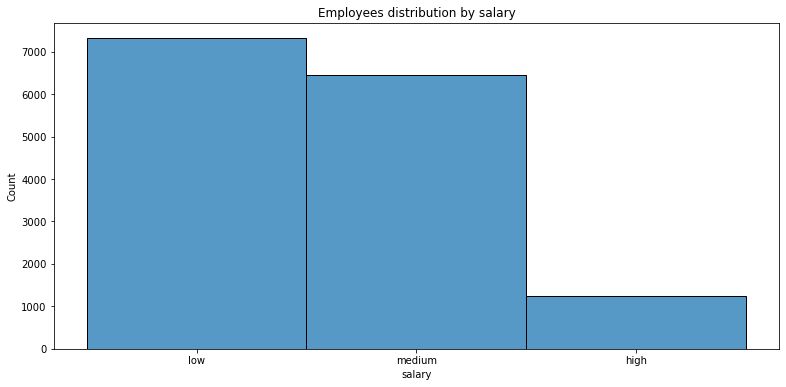

In [16]:
sns.histplot(data=hr, x='salary').set(title='Employees distribution by salary');

## 6. Distribution of employees salaries in every department separately.

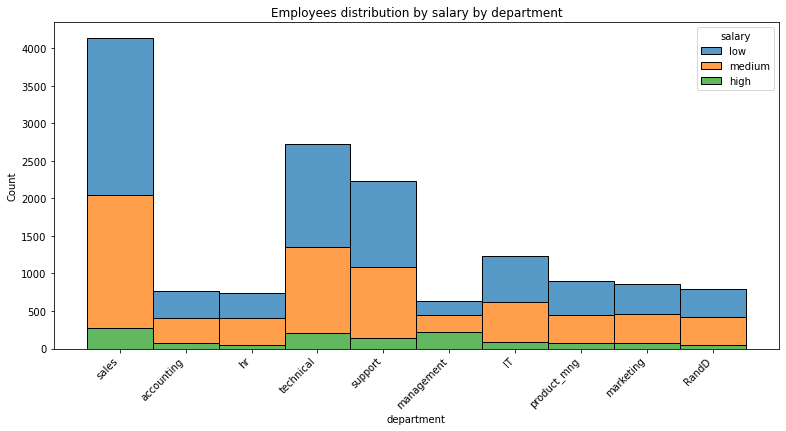

In [15]:
sns.histplot(data=hr, x='department', hue='salary', multiple='stack').set(title='Employees distribution by salary by department')
plt.xticks(rotation=45, ha='right');

## 7. Determine if employees with high salary spend more time at work then the ones with lower salary.

H0: Time spent at work by employees with higher and lower salary is **THE SAME**
H1: Time spent at work by employees with higher and lower salary is **DIFFERENT**

In [18]:
alpha = 0.05
hr_hours_salary_high = hr[hr['salary'] == 'high']['average_monthly_hours'].dropna()
hr_hours_salary_low = hr[hr['salary'] == 'low']['average_monthly_hours'].dropna()
result = stats.ttest_ind(hr_hours_salary_high, hr_hours_salary_low, equal_var=False)

print(hr_hours_salary_high.mean())
print(hr_hours_salary_low.mean())
print(result)
higher_mean = ''

if hr_hours_salary_high.mean() > hr_hours_salary_low.mean():
    higher_mean = 'high'
else:
    higher_mean = 'low'

if result.pvalue < alpha:
    print(f'We reject the null hypothesis, which means that employees with higher and lower salary spend different amount of time at work. Based on the mean values employees with {higher_mean} salary spend more time at work.')
else:
    print('We cannot reject the null hypothesis, which means that employees with higher and lower salary don\'t spend different amount of time at work.')

199.86742118027485
200.9965828321487
Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
We cannot reject the null hypothesis, which means that employees with higher and lower salary don't spend different amount of time at work.


## 8. Calculate the following indicators among employees who quit and who didn't (separately):

In [19]:
hr_left = hr[hr['left'] == 1]
hr_not_left = hr[hr['left'] == 0]

### 8.1. Fraction of employees who got a promotion in the last 5 years

In [20]:
print('Fraction of employees who got a promotion in the last 5 years among employees who quit: ', len(hr_left[hr_left['promotion_last_5years'] == 1]) / len(hr_left))
print('Fraction of employees who got a promotion in the last 5 years among employees who didn\'t quit: ', len(hr_not_left[hr_not_left['promotion_last_5years'] == 1]) / len(hr_not_left))

Fraction of employees who got a promotion in the last 5 years among employees who quit:  0.005320638476617194
Fraction of employees who got a promotion in the last 5 years among employees who didn't quit:  0.026251312565628283


### 8.2. Mean satisfaction level

In [21]:
print('Mean satisfaction level among employees who quit: ', hr_left['satisfaction_level'].mean())
print('Mean satisfaction level among employees who didn\'t quit: ', hr_not_left['satisfaction_level'].mean())

Mean satisfaction level among employees who quit:  0.44009801176140917
Mean satisfaction level among employees who didn't quit:  0.666809590479516


### 8.3. Mean number of projects

In [23]:
# Среднее количество проектов
print('Mean number of projects among employees who quit: ', hr_left['number_project'].mean())
print('Mean number of projects among who didn\'t quit: ', hr_not_left['number_project'].mean())

Mean number of projects among employees who quit:  3.8555026603192384
Mean number of projects among who didn't quit:  3.786664333216661


## 9. Build an LDA (Linear discriminant analysis) model that determines whether an employee quits or not based on available factors (except department and salary).

## 9.1. Drop columns department, salary, and left from the factors dataframe.

In [25]:
hr_lda = hr.drop(columns=['department', 'salary', 'left'])

### 9.2. Split data into test and train samples

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hr_lda, hr['left'], test_size=0.25)

### 9.3. Build an LDA model itself

#### 9.3.1. Initiate model creation

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

#### 9.3.2. Train the model

In [31]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### 9.4. Evaluate the model's quality based on test sample

#### 9.4.1. Calculate accuracy

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7544

#### 9.4.2. Build a confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lda.predict(X_test))

array([[2581,  240],
       [ 681,  248]])

### Conclusions:
1. Model's accuracy - 0.7544, although not an ideal level, still is enough to use the model to one's benefit.
2. Based on confusion matrix the model predicts employee leaving the company when he/she actually quit with the high level of precision.
3. However it often predicts that employee didn't quit when he/she actually quit.